We evaluate a possible range for the infectivity, or $R_0$, of the Coronavirus Covid19. Specifically, we focus on how to extrapolate existing data from China in order to get a complete dataset that we can use for estimation.

We need to keep in mind that $R_0$ is not an absolute metric, it is one based on the virus as much as the society it infects. So different countries may experience distinct $R_0$s for the same epidemic. This notebook is a framework for estimating $R_0$ from data.

#Data from China

This website is a result of good citizenship: People posting real data that can help other people do science, learn from mistakes, and fare better.

Let's download this data, import DXYArea.csv as a pandas dataframe, and plot some interesting plots.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import files
uploaded = files.upload()


Saving DXYArea.csv to DXYArea.csv


In [7]:
covid19_china = pd.read_csv('DXYArea.csv')
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,亚洲,Asia,约旦,Jordan,约旦,Jordan,955010,53,0.0,1,0,2020-03-19 00:31:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,越南,Vietnam,越南,Vietnam,952011,75,0.0,16,0,2020-03-19 00:16:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,巴基斯坦,Pakistan,巴基斯坦,Pakistan,953006,289,0.0,1,0,2020-03-19 00:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,北美洲,North America,古巴,Cuba,古巴,Cuba,974004,10,0.0,0,1,2020-03-19 00:09:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,亚洲,Asia,巴勒斯坦,Palestine,巴勒斯坦,Palestine,955014,44,0.0,0,0,2020-03-19 00:05:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,欧洲,Europe,西班牙,Spain,西班牙,Spain,965015,13716,0.0,1081,598,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,欧洲,Europe,德国,Germany,德国,Germany,963003,11312,0.0,135,26,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,亚洲,Asia,伊朗,Iran,伊朗,Iran,955007,17361,0.0,5710,1135,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,北美洲,North America,美国,United States of America,美国,United States of America,971002,7111,0.0,74,117,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,亚洲,Asia,韩国,Korea,韩国,Korea,951004,8413,0.0,1540,84,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will drop the columns which do not have any significance with our study

In [8]:
covid19_china.drop(['province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode'], axis=1, inplace=True)
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
0,亚洲,Asia,约旦,Jordan,约旦,Jordan,53,1,0,2020-03-19 00:31:40,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,越南,Vietnam,越南,Vietnam,75,16,0,2020-03-19 00:16:32,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,巴基斯坦,Pakistan,巴基斯坦,Pakistan,289,1,0,2020-03-19 00:12:14,NaN,NaN,NaN,NaN,NaN
3,北美洲,North America,古巴,Cuba,古巴,Cuba,10,0,1,2020-03-19 00:09:02,NaN,NaN,NaN,NaN,NaN
4,亚洲,Asia,巴勒斯坦,Palestine,巴勒斯坦,Palestine,44,0,0,2020-03-19 00:05:48,NaN,NaN,NaN,NaN,NaN
5,欧洲,Europe,西班牙,Spain,西班牙,Spain,13716,1081,598,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
6,欧洲,Europe,德国,Germany,德国,Germany,11312,135,26,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
7,亚洲,Asia,伊朗,Iran,伊朗,Iran,17361,5710,1135,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
8,北美洲,North America,美国,United States of America,美国,United States of America,7111,74,117,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
9,亚洲,Asia,韩国,Korea,韩国,Korea,8413,1540,84,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN


In [10]:
len(covid19_china)

83827

In [14]:
covid19_china = covid19_china[covid19_china['countryEnglishName'] == 'China']
len(covid19_china)

71717

In [15]:
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
149,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,武汉,Wuhan,50005.0,40073.0,2490.0
150,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,孝感,Xiaogan,3518.0,3297.0,128.0
151,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,鄂州,Ezhou,1394.0,1290.0,57.0
152,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,随州,Suizhou,1307.0,1222.0,45.0
153,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,荆州,Jingzhou,1580.0,1499.0,50.0
154,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,荆门,Jingmen,928.0,870.0,39.0
155,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,十堰,Shiyan,672.0,645.0,8.0
156,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,仙桃,Xiantao,575.0,535.0,22.0
157,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,黄石,Huangshi,1015.0,963.0,38.0
158,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,宜昌,Yichang,931.0,881.0,36.0


Data Cleaning by dropping the Nan values



In [0]:
covid19_china = covid19_china.dropna()

In [18]:
len(covid19_china)

69707

Get all the city names

In [19]:
china_cities = covid19_china['cityEnglishName'].values
china_cities

array(['Wuhan', 'Xiaogan', 'Ezhou', ..., 'Changchun', 'Shijiazhuang',
       'Yinchuan'], dtype=object)

We will primarily look for the city of Wuhan as it was the epicenter of the Pandemic

We will also set the index to be the update time of the observation

In [22]:
covid19_wuhan = covid19_china[covid19_china["cityEnglishName"] == "Wuhan"]
covid19_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
149,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,武汉,Wuhan,50005.0,40073.0,2490.0
478,亚洲,Asia,中国,China,湖北省,Hubei,67800,56886,3122,2020-03-18 12:12:22,武汉,Wuhan,50005.0,40032.0,2490.0
497,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,2020-03-18 12:11:15,武汉,Wuhan,50005.0,40032.0,2490.0
1325,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,2020-03-18 09:19:13,武汉,Wuhan,50004.0,39220.0,2480.0
2095,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,2020-03-17 19:47:01,武汉,Wuhan,50004.0,39220.0,2480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83125,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 11:49:48,武汉,Wuhan,495.0,0.0,0.0
83382,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:50:40,武汉,Wuhan,495.0,0.0,0.0
83390,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:49:39,武汉,Wuhan,495.0,0.0,0.0
83396,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:48:39,武汉,Wuhan,495.0,0.0,0.0


In [23]:
latest_wuhan = covid19_wuhan.sort_values('updateTime')
latest_wuhan = latest_wuhan.set_index('updateTime')
latest_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:48:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:49:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:50:40,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 11:49:48,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17 19:47:01,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 09:19:13,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 12:11:15,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,武汉,Wuhan,50005.0,40032.0,2490.0


In [24]:
latest_wuhan = covid19_wuhan.sort_values('updateTime')
latest_wuhan = latest_wuhan.set_index('updateTime')
latest_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:48:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:49:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:50:40,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 11:49:48,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17 19:47:01,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 09:19:13,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 12:11:15,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,武汉,Wuhan,50005.0,40032.0,2490.0


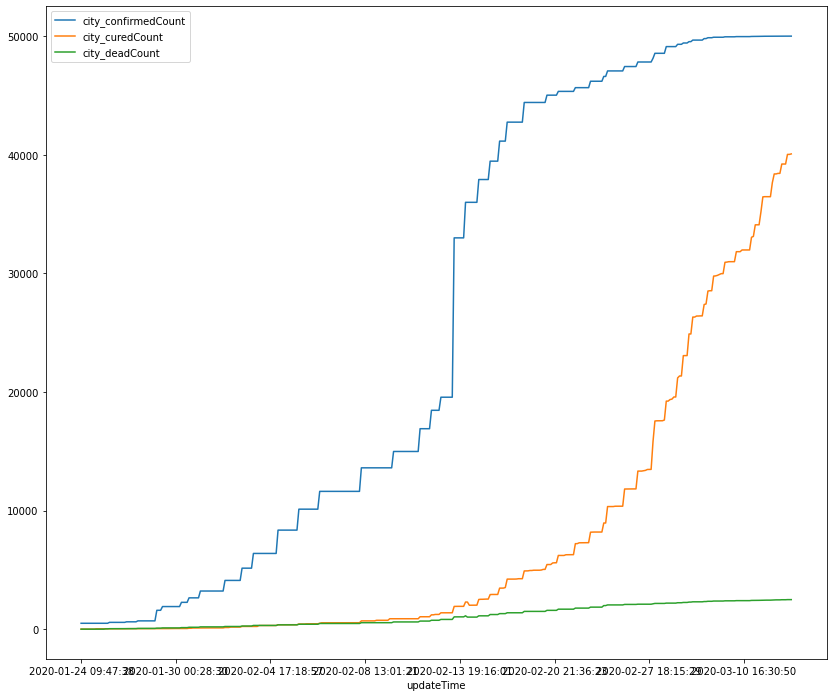

<Figure size 800x1600 with 0 Axes>

In [27]:
import seaborn as sns
plt.figure(figsize=(14,12))
ax = plt.gca()
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')
latest_wuhan.plot(kind='line',  y='city_confirmedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_curedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_deadCount', ax=ax)

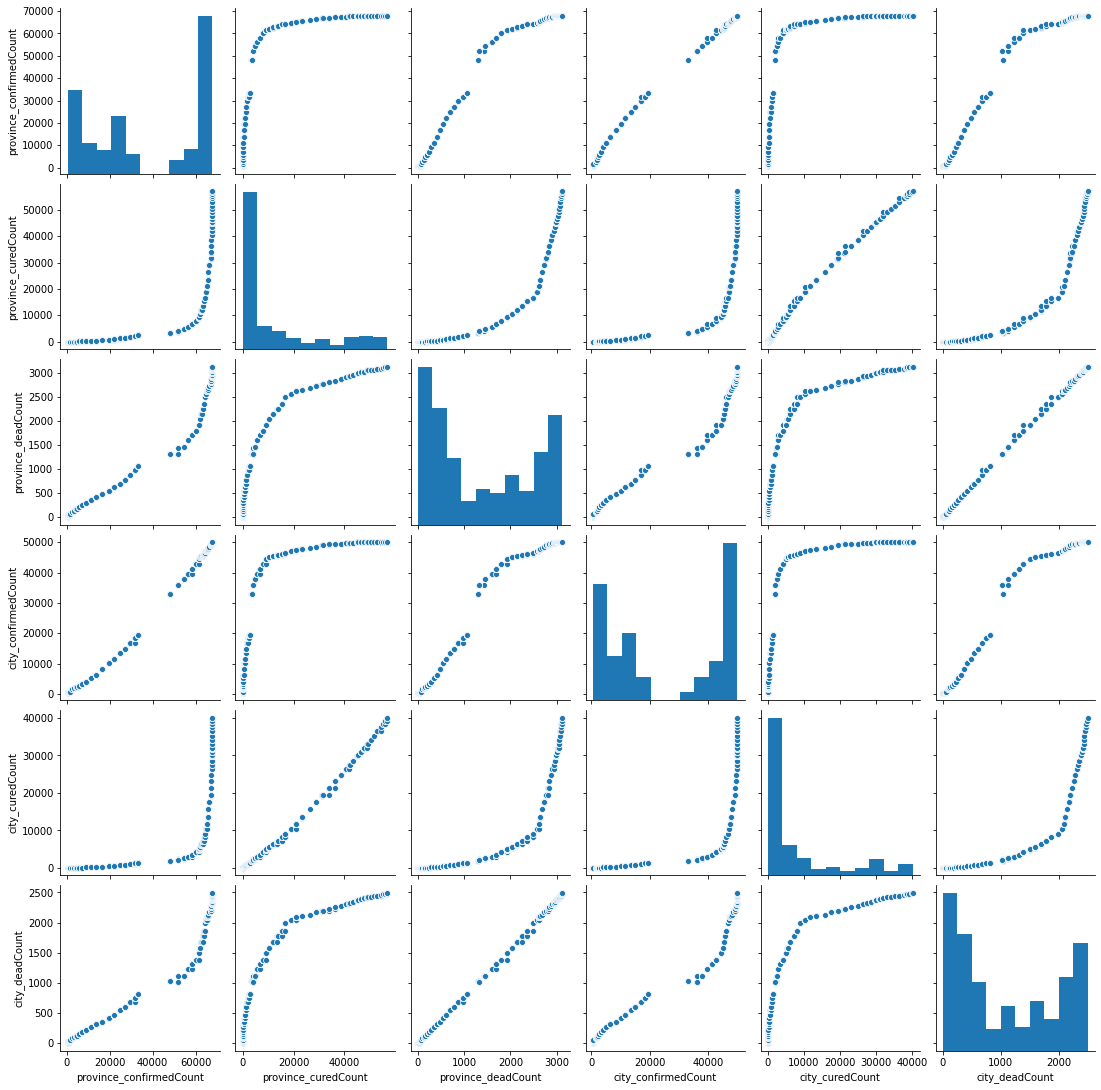

In [28]:
sns.pairplot(latest_wuhan)

#Our model for Infection

In [29]:
!pip install pymc3

In [30]:
import pymc3 as pm
pm.__version__

'3.7'

In [31]:
pip install pymc3[plots]

     |████████████████████████████████| 1.5MB 3.4MB/s 
     |████████████████████████████████| 4.1MB 38.4MB/s 
     |████████████████████████████████| 327kB 44.8MB/s 


In [32]:
!pip install arviz

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

# Acquired immunity controls the infection

The Susceptible-Infected-Recovered model of infection describes time dynamics of an infectious disease spreading through a homogenous closed population (no births or deaths). The population is divided into three categories: ***Susceptible S***, ***Infective I***, or ***Recovered/Dead R***. We can further refine our model by having a different category D for dead, but let's keep it simple for now and include dead people as recovered. When people die, if properly buried, they cannot infect anymore and so they are equivalent to people that have recovered and are immune to the infection.

Susceptible individuals are those that have not acquired immunity yet and are susceptible to becoming infected.

Infected individuals have been infected with the disease.

Recovered individuals are cured and not susceptible anymore to the disease.

## SIR Model of Infections

Differential equations are a mathematical framework for modelling temporal dynamics of a system. The differential equations for the SIR model of infection are:

$$\dfrac{dS}{dt} = - \beta SI \quad S(0) = S_0$$$$\dfrac{dI}{dt} = \beta SI - \gamma I \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
With the constraint that:

$$S(t) + I(t) + R(t) = 1 \;\;, \forall t$$
Other models are available for modeling infectious diseases, such as the IBM model.

If we know R(t) and I(t) then we can determine S(t): $S(t) = 1 - I(t) - R(t)$, so we can work only with the two unknowns: R(t) and I(t). We prefer to work with these because that is what the China Covid19 dataset gives us!

So we write:

$$\dfrac{dI}{dt} = \beta (1 - I - R) I - \gamma I \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
Simplifying:

$$\dfrac{dI}{dt} = \beta (1 - I - R -\gamma/\beta) I  \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
We have two equations in two unknowns, so we're good mathematicaly speaking. What are the parameters?


[Compartmental models in epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)


[SIR Model](https://https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)


$\beta$  is the rate of infection per susceptible and per infective individual: $\beta$ is an average infected to non-infected individual contact (e.g. 4 individuals) and hinges on the underlying society. Arguably, it is higher in China where the population is denser. But it also high in very social Mediterranean countries like Italy and Spain. $\gamma$ is the rate of recovery: It can be interpreted as an average period of infectiousness (e.g. 3 to 5 days for the common flu). For Covid19, experts are astonished by how long an individual can infect others and say that it can be up to 30 days!






>For an example, in the Hong Kong flu in New York City in the late 1960's, hardly anyone was immune at the beginning of the epidemic, so almost everyone was susceptible. [This](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) paper gives an estimate for the parameters. Assuming a trace level of infection in the population, say, 10 people, population variables are S(0) = 7,900,000, I(0) = 10, R(0) = 0. In terms of scaled variables, these initial conditions are s(0) = 1, i(0) = 1.27 x 10-6, r(0) = 0. We don't know values for the parameters  𝛽  and  𝛾  yet, but they can be estimated and then adjusted as necessary to fit the excess death data. The average period of infectiousness is estimated at three days, so that would suggest  𝛾=1/3 . Guessing that each infected individual would make a possibly infecting contact with another individual every two days, then  𝛽  would be  1/2 . So  𝛽/𝛾=3/2>1 .






The quantity  β/γ  is called **R-Nought ( 𝑅0 )**. Its interpretation is that if we were to drop a single infected person into a population of suceptible individuals, we would expect  𝑅0  new infections. If  𝑅0>1 , then an epidemic will take place. If  𝑅0≤1  then there will be no epidemic.

>When  𝑅0<1 , each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will fizzle ( 𝑑𝐼/𝑑𝑡<0 ). When  𝑅0>1 , each person who gets the disease will infect more than one person, so the epidemic will spread ( 𝑑𝐼/𝑑𝑡>0 ).  𝑅0  is the most important quantity in epidemiology.

Let's model our SIR equations using a python function. y is our unknown, it's 2D:  𝑦[0]=𝐼  and  𝑦[1]=𝑅 . . The parameters p are 2D:  𝑝[0]=𝛽  and  𝑝[1]=𝛾 

In accordance with the odeint package of the scipy.integrate library for integrating (solving) ordinary differential equations, we'll write our SIR function thusly, assuming that the constant time step dt is equal to 1.

In [0]:
def SIR(y, t, p):
    di = p[0] * (1. - y[0] - y[1] - p[1]/p[0]) * y[0]
    dr = p[1] * y[0]
    return [di, dr]

In [0]:
def susceptible(i, r):
    s=[]
    for x in range (len(i)):
            s.append(1-i[x]-r[x])
    return s

This will be our time discretization:

In [0]:
times = np.arange(0, 5, 0.25)

Let's compute *exact* values for `y` (y\[0\] = I and y\[1\] = R). Let's assume that I(0) = 0.01 and R(0) = 0. In other words, we start with 1% infected individuals in the population, 0 recovered, and so 1 - 0.01 - 0 = 99% susceptible individuals.

Let's pick some values for $\beta$ and $\gamma$ to begin with (we will model them based on China's data leter on), which guarantee an epidemic ($\beta > \gamma$):

In [0]:
beta, gamma = 4.0, 1.0

Realistically, an individual may be in infectious contact with more than 4 other individuals per day, and Covid19's infectivity is much bigger than 1 day!

We use the library `odeint` from the package `scipy.integrate` to solve the ordinary differential equations for SIR:

In [0]:
from scipy.integrate import odeint

# Compute true curves
y = odeint(SIR, t=times, y0=[0.01, 0.0], args=((beta, gamma),), rtol=1e-8)

In [40]:
y

array([[0.01      , 0.        ],
       [0.0208257 , 0.00369366],
       [0.04246544, 0.01130492],
       [0.083082  , 0.02650486],
       [0.15079362, 0.05513194],
       [0.24292884, 0.10400761],
       [0.3349354 , 0.17661942],
       [0.3933139 , 0.26860411],
       [0.40470816, 0.36928649],
       [0.37975604, 0.46791413],
       [0.3359828 , 0.55761153],
       [0.28660856, 0.63545595],
       [0.23898306, 0.70107272],
       [0.19638616, 0.75537256],
       [0.15983607, 0.79977261],
       [0.12923981, 0.83578799],
       [0.10402352, 0.86484124],
       [0.08345368, 0.88818694],
       [0.06679166, 0.90689355],
       [0.05336167, 0.92185186]])

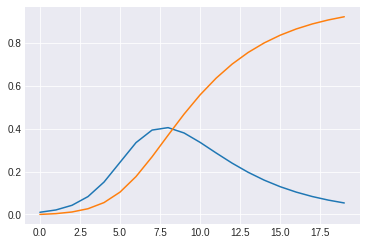

In [41]:
plt.plot(y)

The data has uncertainty (or ***noise***) because of our measurement tools ([aleatoric uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification)), but also because the modeling equations are not perfect ([epistemic uncertainity](https://en.wikipedia.org/wiki/Uncertainty_quantification)).

We pick a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability distribution whose logarithm is *normally distributed* (thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution) as our observations pdf, with a mean equal to the log of `y`. 

>**NOTE**: Recall that taking the logarithm of a histogram of a dataset makes the histogram look much prettier, i.e. closer to a normal distribution, so that we can indeed model it as a normal distribution. So this is a very common operation amongst data scientists.

So, these are our observations: Data from the true curves for I and R with errors 10% and 10% respectively

In [43]:
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.1, 0.1])
yobs

array([[0.01869073, 0.00396746],
       [0.04184135, 0.01181846],
       [0.07827797, 0.0249992 ],
       [0.14971965, 0.04964941],
       [0.20695266, 0.08913803],
       [0.305933  , 0.16953318],
       [0.34953688, 0.26787546],
       [0.36734449, 0.37533768],
       [0.42964504, 0.49608378],
       [0.3659597 , 0.52526379],
       [0.25918091, 0.65562911],
       [0.23364469, 0.6737309 ],
       [0.20681091, 0.75353059],
       [0.17304669, 0.75097537],
       [0.1498701 , 0.80726525],
       [0.09202156, 0.96280808],
       [0.08067223, 1.02482394],
       [0.06869296, 1.04472216],
       [0.05574599, 0.97647616]])

Now plotting our observations as datapoints on top of the exact values for S and I. R is not observed but estimated from the exact curves for S and I. Plotting that, too.

In [0]:
i_ = [i[0] for i in yobs]
r_= [i[1] for i in yobs]

In [58]:
i_

[0.01869073244448485,
 0.041841345052603306,
 0.07827797134128743,
 0.14971965301293833,
 0.2069526573531978,
 0.3059330021116556,
 0.3495368848282626,
 0.36734449271044234,
 0.4296450404575317,
 0.36595969604866047,
 0.2591809148996993,
 0.23364469438261168,
 0.20681091047926298,
 0.1730466850033721,
 0.14987009884744348,
 0.09202156397967966,
 0.0806722338160857,
 0.06869295726891526,
 0.05574599293472588]

In [59]:
r_

[0.00396745769644022,
 0.011818457567886558,
 0.024999203348234585,
 0.04964941377735379,
 0.08913803429645396,
 0.16953317655221448,
 0.26787546167805676,
 0.3753376788266116,
 0.49608378331203057,
 0.5252637936188093,
 0.6556291140342954,
 0.6737309037969698,
 0.75353059475122,
 0.7509753681838155,
 0.8072652493205814,
 0.9628080820003717,
 1.024823936694855,
 1.0447221551836376,
 0.976476163127081]

In [60]:
s = susceptible(i_ ,r_)
s

[0.9773418098590749,
 0.9463401973795101,
 0.896722825310478,
 0.8006309332097079,
 0.7039093083503483,
 0.52453382133613,
 0.3825876534936806,
 0.25731782846294604,
 0.07427117623043772,
 0.10877651033253033,
 0.08518997106600534,
 0.09262440182041853,
 0.039658494769516994,
 0.07597794681281245,
 0.042864651831975076,
 -0.054829645980051356,
 -0.10549617051094073,
 -0.11341511245255287,
 -0.032222156061806895]

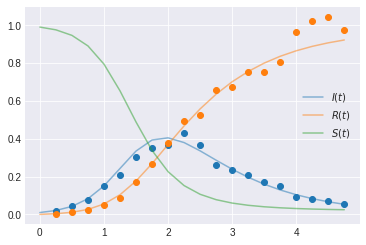

In [61]:
plt.plot(times[1::],yobs, marker='o', linestyle='none')
plt.plot(times, y[:,0], color='C0', alpha=0.5, label=f'$I(t)$')
plt.plot(times, y[:,1], color ='C1', alpha=0.5, label=f'$R(t)$')
plt.plot(times, susceptible(y[:,0], y[:,1]), color ='C2', alpha=0.5, label=f'$S(t)$')
plt.legend()


Driven by rising infections, susceptible population diminishes due to acquired immunity, which controls the infection and brings it down to zero after it reaches a peak of 40% of the population, for the values of the parameters $\beta$ and $\gamma$ that we picked. Very sobering.

Our China data though is only up to timepoint 2 in the graph above. We have yet to observe the infection to come down. All we observe in China is that the number of new infections is coming down to almost zero, which means we are approaching the peak of the Infected curve $I(t)$.

